In [3]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [18]:
def ising_term(l):
    if (l==1): return np.zeros((2,2))
    if (l==2): return np.matmul(np.kron(hm.Z,hm.I), np.kron(hm.I, hm.Z))
    return (np.kron(ising_term(l-1), np.eye(2)) + 
            np.kron(np.eye(2**(l-2)), np.matmul(np.kron(hm.Z,hm.I), np.kron(hm.I, hm.Z))))

In [19]:
def rand_field(L, h):
    H = np.zeros((2**L, 2**L), dtype='complex128')
    for i in range(L):
        hi = random.uniform(-h,h)
        Hi = 1
        for j in range(L):
            if (j==i): Hi = np.kron(Hi, hi*hm.Z)
            else: Hi = np.kron(Hi,hm.I)
        H += Hi
    return H

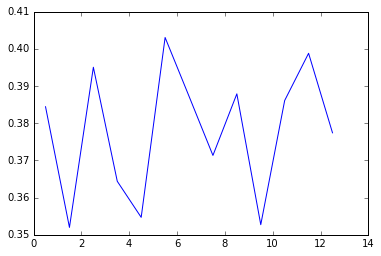

In [49]:
L = 8
n = 13
rs = np.zeros(n)
for idx, h in enumerate(np.linspace(.5,12.5,n)):
    r = 0
    
    # I know I need more trials, but this is running pretty slow as it is
    # Switching to sparse matrices will help`
    trials = 10
    for j in range(trials):
        H = ising_term(L) + rand_field(L, h)
        
        # Get only S_z=0 states
        Hsmal_i = hm.mat2list(H)[(int)(L/2)]
        vals, vecsH = la.eigh(Hsmal_i)
        delta = (vals - np.roll(vals, 1))[1:]
        stats = (np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)))[1:]
        r += np.average(stats)
    rs[idx] = r/trials
#     print(h, np.average(stats))
plt.plot(np.linspace(.5,12.5,n), rs)
plt.show()